In [ ]:
pip install fastai

In [8]:
from fastai.vision.all import *

path = Path('map_images')

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

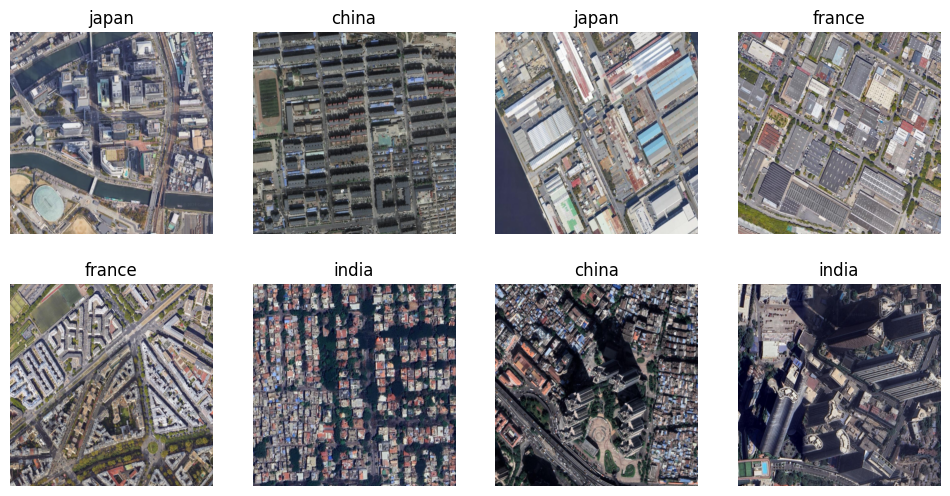

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(560, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=8)

In [49]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.263072,1.099817,0.437500,02:40


epoch,train_loss,valid_loss,error_rate,time
0,0.835284,0.524312,0.200000,03:26
1,0.518159,0.329319,0.125000,03:19
2,0.355702,0.333231,0.137500,03:18
3,0.253649,0.330472,0.125000,03:33
4,0.194193,0.327448,0.125000,03:27


In [50]:
learn.save('country_identifier_model')

Path('models/country_identifier_model.pth')

In [51]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.load('country_identifier_model')

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related

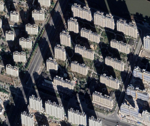

This is: china.
Probability it's china: 0.9919
Probability it's france: 0.0000
Probability it's india: 0.0021
Probability it's japan: 0.0001
Probability it's usa: 0.0058


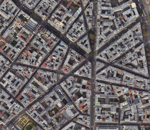

This is: france.
Probability it's china: 0.1135
Probability it's france: 0.8465
Probability it's india: 0.0187
Probability it's japan: 0.0190
Probability it's usa: 0.0024


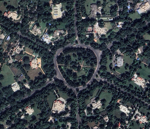

This is: india.
Probability it's china: 0.0002
Probability it's france: 0.0000
Probability it's india: 0.9998
Probability it's japan: 0.0000
Probability it's usa: 0.0000


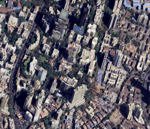

This is: india.
Probability it's china: 0.0001
Probability it's france: 0.0000
Probability it's india: 0.9998
Probability it's japan: 0.0000
Probability it's usa: 0.0001


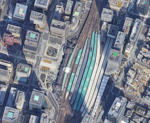

This is: japan.
Probability it's china: 0.0002
Probability it's france: 0.0082
Probability it's india: 0.0127
Probability it's japan: 0.9648
Probability it's usa: 0.0142


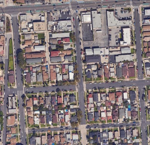

This is: usa.
Probability it's china: 0.0032
Probability it's france: 0.0061
Probability it's india: 0.0124
Probability it's japan: 0.0013
Probability it's usa: 0.9770


In [52]:
countries = 'china','france', 'india1', 'india2', 'japan', 'usa'

for coun in countries:
    dest = f'testing_images/{coun}.png'
    country,_,probs = learn.predict(PILImage.create(dest))
    im = Image.open(dest).to_thumb(150,150)
    display(im)
    print(f"This is: {country}.")
    print(f"Probability it's china: {probs[0]:.4f}")
    print(f"Probability it's france: {probs[1]:.4f}")
    print(f"Probability it's india: {probs[2]:.4f}")
    print(f"Probability it's japan: {probs[3]:.4f}")
    print(f"Probability it's usa: {probs[4]:.4f}")
    